## Lecture 4.3: Time-series data
    
- In this section we will go over how to present trends over time.

- Data for this demonstration is from the [Data.Medicare.com](https://data.medicare.gov/Home-Health-Compare/Home-Health-Care-Patient-survey-HHCAHPS-/ccn4-8vby/data)'s Home Health Care website.

    - The **HCAHPS** (Hospital Consumer Assessment of Healthcare Providers and Systems) survey is a national, standardized, publicly reported survey of patients' perspectives of hospital care.
    
- **If you have any questions over the course of this lecture, please post them to the 'Day 4 Lecture Questions' assignment on the Canvas course page.**

## Load in your modules and data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


HCAHPS = pd.read_csv('HCAHPS.csv', quotechar='"')
HCAHPS = HCAHPS[HCAHPS['Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family'] != 'Not Available']
#d.replace(to_replace='Not Available', value=0, inplace=True)


## Look at columns aka variables

In [2]:
HCAHPS.dtypes

State                                                                                                                                 object
CMS Certification Number (CCN)*                                                                                                        int64
Provider Name                                                                                                                         object
Address                                                                                                                               object
City                                                                                                                                  object
Zip                                                                                                                                    int64
Phone                                                                                                                                  int64
Type of Owner

In [8]:
# for our time series data we need to use the dates,
HCAHPS

,State,CMS Certification Number (CCN)*,Provider Name,Address,City,Zip,Phone,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,...,Star Rating for how patients rated overall care from agency,Footnote for Star Rating for overall care from agency,Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),Footnote for percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),"Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family","Footnote for percent of patients who reported YES, they would definitely recommend the home health agency to friends and family",Number of completed Surveys,Footnote for number of completed surveys,Response rate,Footnote for response rate
0,AL,17000,ALABAMA DEPARTMENT OF PUBLIC HEALTH HOME CARE,"201 MONROE STREET, THE RSA TOWER, SUITE 1200",MONTGOMERY,36104,3342065341,Official Health Agency,Yes,Yes,...,4,NaN,89,NaN,82,NaN,787,NaN,26,NaN
1,AL,17009,ENCOMPASS HEALTH HOME HEALTH,"2970 LORNA ROAD, STE 104",VESTAVIA HILLS,35216,2058242680,Local,Yes,Yes,...,4,NaN,90,NaN,87,NaN,309,NaN,35,NaN
2,AL,17013,KINDRED AT HOME,1239 RUCKER BLVD,ENTERPRISE,36330,3343470234,Official Health Agency,Yes,Yes,...,4,NaN,90,NaN,91,NaN,274,NaN,37,NaN
3,AL,17014,AMEDISYS HOME HEALTH,68278 MAIN STREET,BLOUNTSVILLE,35031,8664864919,Local,Yes,Yes,...,4,NaN,86,NaN,83,NaN,128,NaN,30,NaN
4,AL,17016,SOUTHEAST ALABAMA HOMECARE,804 GLOVER AVENUE,ENTERPRISE,36330,3343474800,Local,Yes,Yes,...,4,NaN,90,NaN,87,NaN,209,NaN,33,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11154,TX,747960,CARE GUARDIAN HEALTH SERVICES INC,1701 JACAMAN RD SUITE RP8-F,LAREDO,78041,9567255539,Local,Yes,Yes,...,Not Available,11,84,11,69,11,27,NaN,19,NaN
11160,TX,747969,A SPECIAL HOME HEALTH LLC,602 N FLORES STREET,RIO GRANDE CITY,78582,9564886828,Local,Yes,Yes,...,Not Available,9,92,9,92,9,9,NaN,19,NaN
11162,TX,747971,"SACRED CARE HOME HEALTH, LLC",307 WEST MILAM STREET SUITE 201,WHARTON,77488,9795313068,Local,Yes,Yes,...,4,11,87,11,87,11,50,NaN,25,NaN
11164,TX,747974,"GENEROUS HOME CARE MANAGEMENT, LLC",8600 WURZBACH RD STE. 802,SAN ANTONIO,78240,2102395056,Local,Yes,Yes,...,Not Available,11,65,11,71,11,14,NaN,26,NaN


## Change dates from string to date format

- You can use the panda attribute `to_datetime` to change data to a date format.
- It is loaded as a string because the / in each numerical date object.

In [7]:

cert_year = pd.DataFrame()
cert_year['Year Certified'] = pd.to_datetime(HCAHPS['Date Certified'], infer_datetime_format=True)
cert_year['Percent Recommend'] = HCAHPS['Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family'].astype(float)
cert_year


,Year Certified,Percent Recommend
0,1966-07-01,82.0
1,1973-01-18,87.0
2,1975-07-24,91.0
3,1975-09-04,83.0
4,1976-06-09,87.0
...,...,...
11154,2015-08-13,69.0
11160,2016-01-20,92.0
11162,2015-11-17,87.0
11164,2015-09-26,71.0


In [9]:
cert_year["Year Certified"] = cert_year["Year Certified"].dt.year
cert_year

,Year Certified,Percent Recommend
0,1966,82.0
1,1973,87.0
2,1975,91.0
3,1975,83.0
4,1976,87.0
...,...,...
11154,2015,69.0
11160,2016,92.0
11162,2015,87.0
11164,2015,71.0


## Plot
- Now we can use the attributes of `groupby` to plot our data.

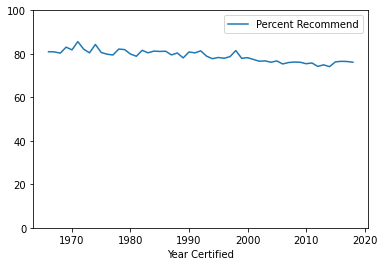

In [10]:

plot = cert_year.groupby(['Year Certified']).mean().plot(style='-')
plot.set_ylim(0,100)
plot

(0.0, 100.0)

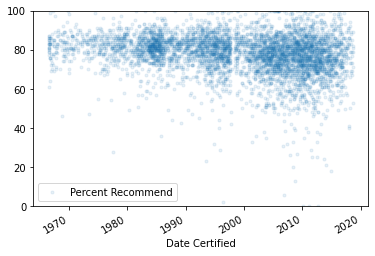

In [11]:
date_cert = pd.DataFrame()
date_cert['Date Certified'] = pd.to_datetime(HCAHPS['Date Certified'],infer_datetime_format=True)
date_cert['Percent Recommend'] = HCAHPS['Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family'].astype(float)

plot2 = date_cert.groupby(['Date Certified']).mean().plot(style='.', alpha=.1)
plot2.set_ylim(0,100)


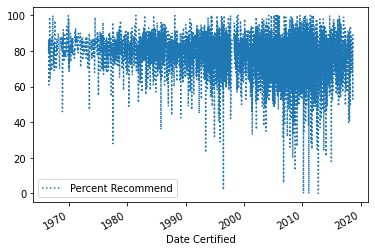

In [14]:
plot3 = date_cert.groupby(['Date Certified']).mean().plot(style=':')
plot3

## Look at the rolling average.

- Now we can make a more detailed representation by looking at the overall observations for each year and also plotting a 'rolling average'
    - The rolling average takes the average of a specified number of observations.

In [19]:
recommend = pd.DataFrame()
recommend['Date Certified'] = pd.to_datetime(HCAHPS['Date Certified'], infer_datetime_format=True)
recommend['Percent Recommend'] = HCAHPS['Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family'].astype(float)

data = recommend.groupby(['Date Certified']).mean()

data

,Percent Recommend
Date Certified,
1966-07-01,80.991342
1966-07-06,80.500000
1966-07-07,79.000000
1966-07-09,83.000000
1966-07-11,86.000000
...,...
2018-08-19,53.000000
2018-08-21,89.000000
2018-08-22,71.000000


In [23]:
ma = data.rolling(40).mean() #. This takes a moving window of time, and calculates the average or the mean of that time period as the current value.

ma


,Percent Recommend
Date Certified,
1966-07-01,NaN
1966-07-06,NaN
1966-07-07,NaN
1966-07-09,NaN
1966-07-11,NaN
...,...
2018-08-19,76.7125
2018-08-21,77.2125
2018-08-22,77.3125


In [24]:
data.index

DatetimeIndex(['1966-07-01', '1966-07-06', '1966-07-07', '1966-07-09',
               '1966-07-11', '1966-07-14', '1966-07-18', '1966-07-19',
               '1966-07-26', '1966-07-29',
               ...
               '2018-06-20', '2018-07-02', '2018-07-09', '2018-07-12',
               '2018-08-10', '2018-08-19', '2018-08-21', '2018-08-22',
               '2018-08-23', '2018-08-29'],
              dtype='datetime64[ns]', name='Date Certified', length=5082, freq=None)

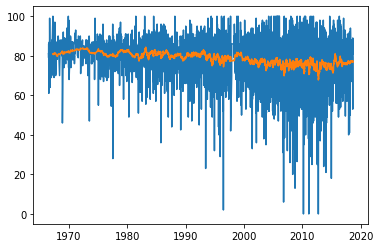

In [25]:
plt.figure()

plt.plot(data.index, data)

plt.plot(ma.index, ma)
